<a href="https://colab.research.google.com/github/ADinng/CS6319_MachineLearning/blob/main/CS6319_MachineLearing_Lecture7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7

Symbolic classification and regression

In [ ]:
!pip install gplearn
from gplearn.genetic import SymbolicClassifier

sc = SymbolicClassifier()

In [ ]:
from sklearn.metrics import mean_absolute_error

sc.fit(X,y)
y1 = sc.predict(X)
mae= mean_absolute_error(y, y1)

NameError: name 'X' is not defined

## Multiple classes and imbalanced datasets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset

In [ ]:
mnisttra = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra",header=None)
mnisttes = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes",header=None)


In [ ]:
# split label
mnisttrad = mnisttra.drop(64, axis=1)
mnisttesd = mnisttes.drop(64, axis=1)
mnisttral = mnisttra[64].copy()
mnisttesl = mnisttes[64].copy()

In [ ]:
mnisttral

,64
0,0
1,0
2,7
3,4
4,6
...,...
3818,9
3819,4
3820,6
3821,6


Make binary classification data

*   predict whether a digit is 5 or not



In [ ]:
ytra = (mnisttral == 5)
ytes = (mnisttesl == 5)

# label encoder
le = LabelEncoder()
ytrae = le.fit_transform(ytra)

Apply classifiers

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit, cross_val_score

classifier = LinearSVC()
split = ShuffleSplit(n_splits=10, test_size=0.2)
score = cross_val_score(classifier, mnisttrad, ytrae, scoring="accuracy", cv=split)
print("LS accuracy mena=", score.mean())

# using accuracy isn't appropriate for imbalance data

LS accuracy mena= 0.9888888888888889


Confusin matrix

In [ ]:
real = [0, 1, 0, 1, 0, 0, 0, 0]
pred = [1, 1, 0, 1, 0, 0, 0, 0]

from sklearn.metrics import confusion_matrix
print(confusion_matrix(real, pred))

[[5 1]
 [0 2]]


In [ ]:
from sklearn.model_selection import cross_val_predict

ypred = cross_val_predict(classifier, mnisttrad, ytrae, cv=3)
print(confusion_matrix(ypred, ytrae))

[[3421   13]
 [  26  363]]


Alternative to accuracy & confusion matrices

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
real = [0,1,0,1,0,0,0,0]
pred = [1,1,0,1,0,0,0,0]

print(precision_score(real, pred))
print(recall_score(real, pred))
print(f1_score(real, pred))

0.6666666666666666
1.0
0.8


In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
scores = cross_val_score(classifier, mnisttrad, ytrae, scoring="f1", cv = split)
print("DT f1 mean = ", score.mean()," stddev = ", scores.std())

DT f1 mean =  0.9888888888888889  stddev =  0.022580267279982205


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
scores = cross_val_score(classifier, mnisttrad, ytrae, scoring="f1", cv = split)
print("DT f1 mean = ", score.mean()," stddev = ", scores.std())

DT f1 mean =  0.9888888888888889  stddev =  0.018863463634875264


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
scores = cross_val_score(classifier, mnisttrad, ytrae, scoring="f1", cv = split)
print("DT f1 mean = ", score.mean()," stddev = ", scores.std())

DT f1 mean =  0.9888888888888889  stddev =  0.0065358274736349396


# Lecture 08

multiclass classification

In [ ]:
mnisttrale = le.fit_transform(mnisttral)
classifier = DecisionTreeClassifier()
split = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(classifier, mnisttrad, mnisttrale, scoring="accuracy", cv=split)
print("DT accuracy mean = ",scores.mean(), " stddev = ", scores.std())

DT accuracy mean =  0.895686274509804  stddev =  0.01168893537574283


In [ ]:
mnisttrale

array([0, 0, 7, ..., 6, 6, 7])

generate a confusion matrix for multiclass problems


*   rows represent actual classes
*   columns represent predicted classes



In [ ]:
ypred = cross_val_predict(classifier, mnisttrad, mnisttrale, cv=3)
conf = confusion_matrix(ypred, mnisttrale)
print(conf)

[[358   0   1   0   2   0   1   1   6   1]
 [  0 323  10   6  12   6   6   2  16   8]
 [  1   9 335  10   0   5   3   3  16   9]
 [  2  13   5 341   1   8   1   6   4   8]
 [  2   7   2   2 330   3   8   5   5  17]
 [  2   5   4  12   8 343   0   0   0  10]
 [  5   3   3   0  10   0 356   0   3   0]
 [  0  11   0   4   5   0   0 363   5   7]
 [  6   8  14   7   4   6   2   3 319   2]
 [  0  10   6   7  15   5   0   4   6 320]]


this is a lot of numbers to take in, so it might be easier to get a graphical version

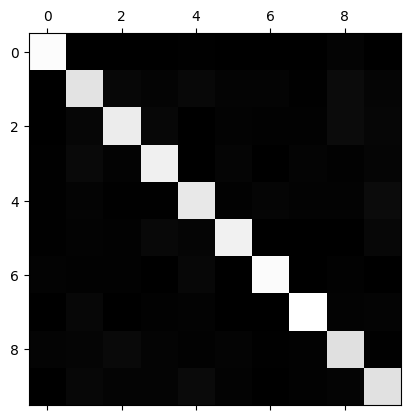

In [ ]:
import matplotlib as plt
plt.pyplot.matshow(conf, cmap=plt.cm.gray)

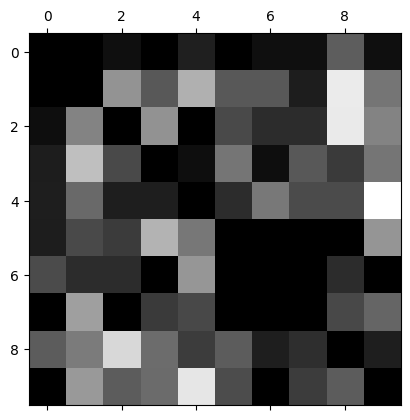

In [ ]:
rowsums = conf.sum(axis=1, keepdims=True)
normconf = conf/rowsums
np.fill_diagonal(normconf, 0)
plt.pyplot.matshow(normconf, cmap=plt.cm.gray)

case today

In [ ]:
firewall = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00542/log2.csv")


In [ ]:
firewall['Action'].value_counts()

,count
Action,
allow,37640
deny,14987
drop,12851
reset-both,54


In [ ]:
from sklearn.model_selection import train_test_split
firetrain, firetest = train_test_split(firewall, test_size=0.2)

In [ ]:
# iloc[row index, colum index] 左闭又开，traindata 只取5-10列
traindata = firetrain.iloc[:,5:11]
trainlabs = firetrain.iloc[:,4]
testdata = firetest.iloc[:,5:11]
testlabs = firetest.iloc[:,4]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
traindatar = scaler.fit_transform(traindata)
testdatar = scaler.transform(testdata)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
trainlabse = le.fit_transform(trainlabs)
testlabse = le.transform(testlabs)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

classifier = LinearSVC()
split = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(classifier, traindatar, trainlabse, scoring="f1_macro", cv=split)
print("LS f1 mean =", scores.mean()," stddev =",scores.std())

LS f1 mean = 0.18254225752208098  stddev = 0.0010802403153964807


grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

params =[{'n_neighbors': [3, 5, 8, 13],
          'weights': ['uniform','distance'],
          'p':[1,2]}]
classifier = KNeighborsClassifier()
search = GridSearchCV(classifier, params, cv=5, scoring ="f1_macro")
search.fit(traindatar, trainlabse)

print("best params: ", search.best_params_)
print("best score: ", search.best_score_)

best params:  {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
best score:  0.7476954686129262


In [ ]:
params =[{'n_neighbors': [6, 8, 10, 15, 18]}]
classifier = KNeighborsClassifier(weights='distance',p=1)
search = GridSearchCV(classifier, params, cv=5, scoring ="f1_macro")
search.fit(traindatar, trainlabse)

print("best params: ", search.best_params_)
print("best score: ", search.best_score_)

best params:  {'n_neighbors': 18}
best score:  0.7487962725321669


In [ ]:
from sklearn.metrics import f1_score
classifier = KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
classifier.fit(traindatar, trainlabse)
y1 = classifier.predict(testdatar)
print(" Test f1 = ", f1_score(testlabse, y1, average='macro'))